<a href="https://colab.research.google.com/github/yujiimt/gan_study/blob/main/mosaic_GAN/notebook/mosic_ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -LO http://download.tensorflow.org/example_images/flower_photos.tgz
!tar xzf flower_photos.tgz > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0   184M      0  0:00:01  0:00:01 --:--:--  184M


In [ ]:
!cp flower_photos/sunflowers/1008566138_6927679c8a.jpg flower.jpg

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
sample_image = "/content/flower.jpg"

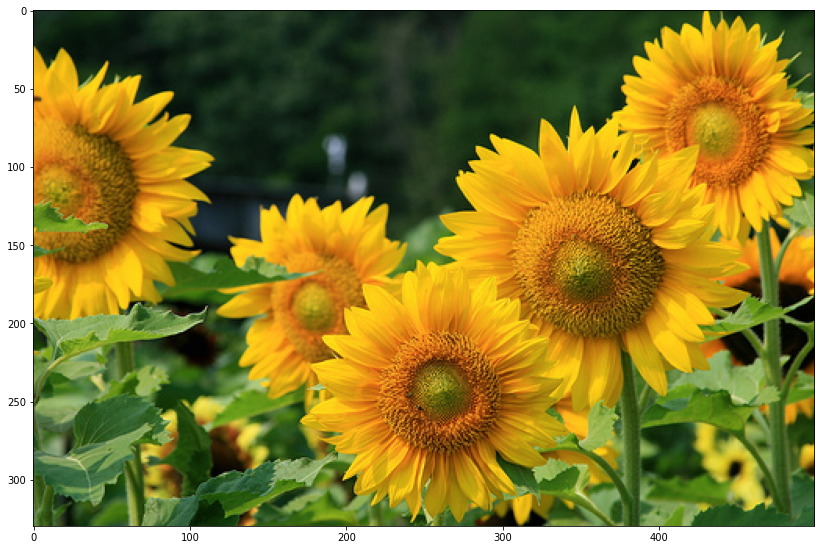

In [ ]:
with Image.open(sample_image) as f:
  fig = plt.figure(figsize=(14, 14))
  ax = fig.gca()
  ax.imshow(f)

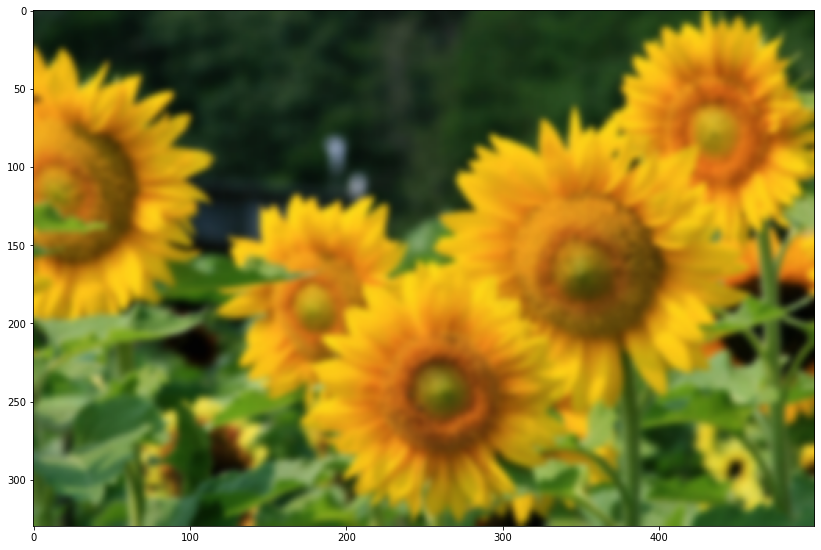

In [ ]:
with Image.open(sample_image) as img:
  img = img.filter(ImageFilter.GaussianBlur())
  fig = plt.figure(figsize = (14, 14))
  ax = fig.gca()
  ax.imshow(img)

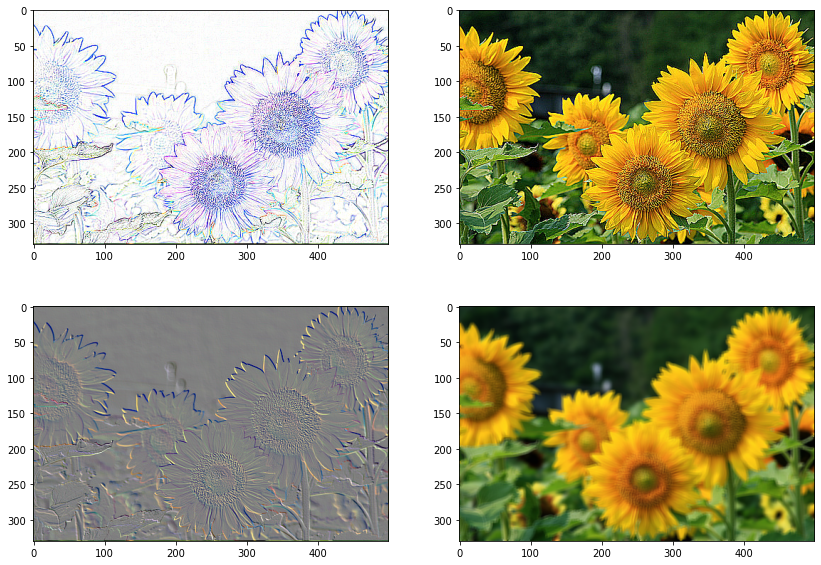

In [ ]:
with Image.open(sample_image) as img:
  img1 = img.filter(ImageFilter.CONTOUR())
  img2 = img.filter(ImageFilter.EDGE_ENHANCE())
  img3 = img.filter(ImageFilter.EMBOSS())
  img4 = img.filter(ImageFilter.BLUR())

  imgs = [img1, img2, img3, img4]

  fig = plt.figure(figsize = (14, 10))
  for i, x in enumerate(imgs):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(x)

In [ ]:
import numpy as np

In [ ]:
def conv(inputs, kernel):
  row, column = inputs.shape
  kr, kc = kernel.shape
  outputs = np.zeros((row-kr+1, column-kc+1), inputs.dtype)
  for i in range(outputs.shape[0]):
    for j in range(outputs.shape[1]):
      patch = inputs[i:i+kr, j:j+kc]
      prod = patch * kernel
      sum = np.sum(prod)
      outputs[i, j] = sum

  return outputs



In [ ]:
X = np.arange(25, dtype = np.float32).reshape(5, 5)
kernel = np.arange(9, dtype = np.float32).reshape(3, 3)
conv(X, kernel)

array([[312., 348., 384.],
       [492., 528., 564.],
       [672., 708., 744.]], dtype=float32)

In [ ]:
kernel1 = np.zeros(9).reshape(3, 3)

In [ ]:
kernel1 = (np.arange(9).reshape(3, 3) == 0).astype(np.float32)

In [ ]:
for i in [0, 1, 3, 4]:
  kernel = (np.arange(9).reshape(3, 3) == i).astype(np.float32)
  print("k" + str(i+1))
  print(conv(X, kernel))

k1
[[ 0.  1.  2.]
 [ 5.  6.  7.]
 [10. 11. 12.]]
k2
[[ 1.  2.  3.]
 [ 6.  7.  8.]
 [11. 12. 13.]]
k4
[[ 5.  6.  7.]
 [10. 11. 12.]
 [15. 16. 17.]]
k5
[[ 6.  7.  8.]
 [11. 12. 13.]
 [16. 17. 18.]]


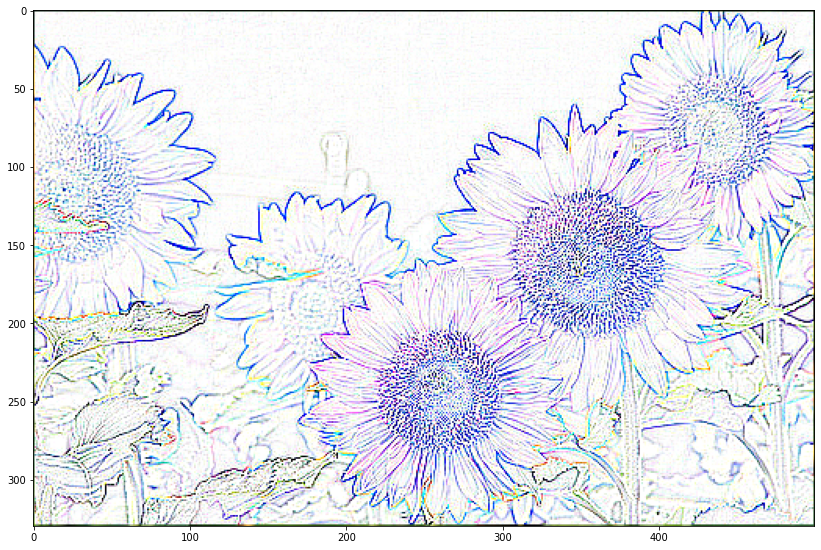

In [ ]:
with Image.open(sample_image) as img:
  img = img.filter(ImageFilter.Kernel(size = (3, 3), kernel = (-1, -1, -1, -1, 8, -1, -1, -1, -1), scale = 1, offset = 255))
  fig = plt.figure(figsize = (14, 14))
  ax =fig.gca()
  ax.imshow(img)

In [ ]:
import tensorflow as tf

In [ ]:
img = tf.io.decode_jpeg(tf.io.read_file(sample_image))
print(img.shape)

(330, 500, 3)


In [ ]:
img = tf.expand_dims(img, axis = 0)
print(img.shape)

(1, 330, 500, 3)


In [ ]:
kernel = np.array([-1, -1, -1, -1, 10, -1, -1, -1, -1]).reshape(3, 3, 1, 1) / 2.0
kernel = kernrl.astype(np.float32)
print(kernel.shape)
print(kernel)

(3, 3, 1, 1)
[[[[-0.5]]

  [[-0.5]]

  [[-0.5]]]


 [[[-0.5]]

  [[ 5. ]]

  [[-0.5]]]


 [[[-0.5]]

  [[-0.5]]

  [[-0.5]]]]


In [ ]:
kernel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


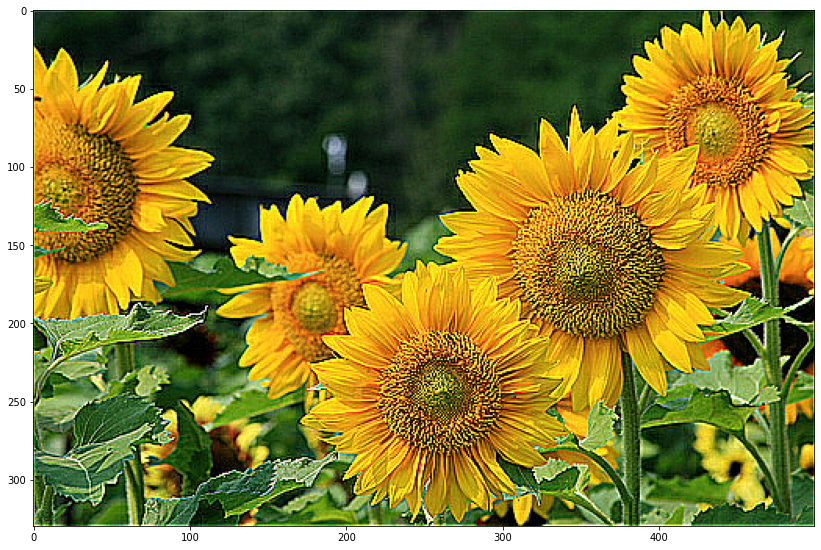

In [ ]:
outputs = []
float_img = tf.cast(img, tf.float32) / 255.0
#unit -> float へのキャスト[0, 255] -> [0,1]への変換
for i in range(3):
  conv_result = tf.nn.conv2d(float_img[:,:,:,i:i+1], kernel, 1, padding = "SAME")
  outputs.append(conv_result)
outputs = tf.concat(outputs, axis=-1)
#(1, H, W, 1) -> (1, H, W, 3)に結合
fig = plt.figure(figsize = (14, 14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())

In [ ]:
emboss_kernel = np.array([-1, 0, 0, 0, 1, 0, 0, 0, 0]).reshape(3, 3, 1, 1)
emboss_kernel = np.broadcast_to(emboss_kernel, (3, 3, 3, 1))
emboss_kernel = emboss_kernel.astype(np.float32)
print(emboss_kernel.shape)
print(emboss_kernel)

(3, 3, 3, 1)
[[[[-1.]
   [-1.]
   [-1.]]

  [[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]]

  [[ 1.]
   [ 1.]
   [ 1.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


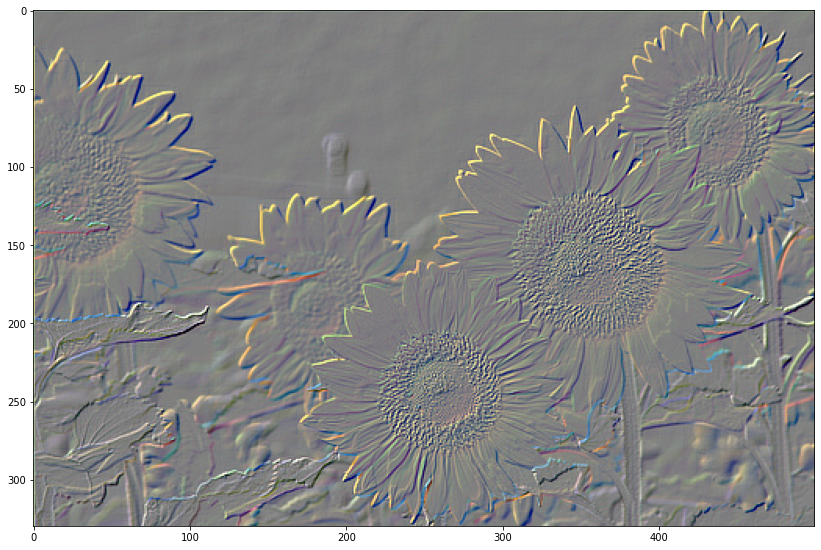

In [ ]:
outputs = tf.nn.depthwise_conv2d(float_img, emboss_kernel, strides = [1, 1, 1, 1], padding = "SAME") + 0.5
fig = plt.figure(figsize = (14, 14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


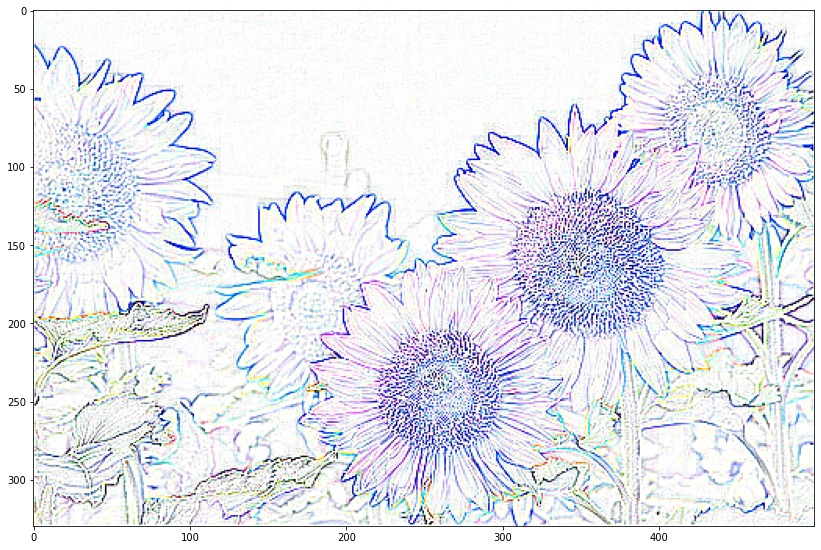

In [67]:
contour_kernel = np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1]).reshape(3, 3, 1, 1).astype(np.float32)
contour_kernel = np.broadcast_to(contour_kernel, (3,3,3,3))
mask = np.eye(3).reshape(1, 1, 3, 3).astype(np.float32)
contour_kernel = contour_kernel * mask
outputs = tf.nn.conv2d(float_img, contour_kernel, 1, padding="SAME")
outputs += 1.0

fig = plt.figure(figsize=(14, 14))
ax = fig.gca()
ax.imshow(outputs[0].numpy())

In [ ]:
g